# M24E02_GBM
### Aluna: Cristina Freitas


### Exercício 2:
### Acesse  o material e crie um Jupyter Notebook contendo um exemplo de GBM

Acurácia: 0.956140350877193

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



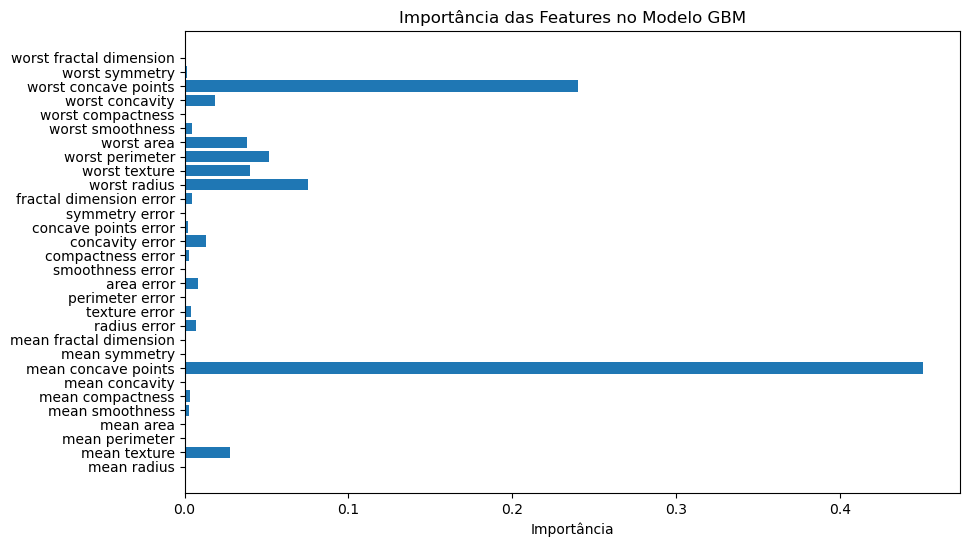

Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Acurácia do modelo otimizado: 0.956140350877193

Relatório de Classificação do modelo otimizado:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

CPU times: total: 2min 15s
Wall time: 2min 35s


In [1]:
%%time

# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Carregando o dataset Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Dividindo o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo GBM
gbm = GradientBoostingClassifier(random_state=42)

# Treinando o modelo com os dados de treino
gbm.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = gbm.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Visualizando a importância das features
feature_importance = gbm.feature_importances_

# Plotando as importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importance)
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo GBM')
plt.show()

# Ajuste de hiperparâmetros (opcional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Usando GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Avaliando o modelo otimizado
best_gbm = grid_search.best_estimator_
y_pred_best = best_gbm.predict(X_test)

print("\nAcurácia do modelo otimizado:", accuracy_score(y_test, y_pred_best))
print("\nRelatório de Classificação do modelo otimizado:\n", classification_report(y_test, y_pred_best))


### Exercício 4:
### Utilize o GridSearch para encontrar os melhores hiperparametros para um conjunto de dados do exemplo (load_iris)

In [2]:
%%time
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Carregar o conjunto de dados Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo Gradient Boosting
gbm = GradientBoostingClassifier(random_state=42)

# Definir os hiperparâmetros para o GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],        # Número de árvores
    'learning_rate': [0.01, 0.1, 0.2],     # Taxa de aprendizado
    'max_depth': [3, 5, 7],                 # Profundidade das árvores
    'subsample': [0.8, 0.9, 1.0]            # Subamostragem
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Treinar o modelo
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor Acurácia:", grid_search.best_score_)

# Avaliar no conjunto de teste
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Acurácia no Conjunto de Teste:", test_accuracy)



Melhores Hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Melhor Acurácia: 0.9523809523809523
Acurácia no Conjunto de Teste: 1.0
CPU times: total: 1.73 s
Wall time: 2min 43s
